# Assignment 1 Yingnan Zhao id: 260563769

### Question 1

### 1.1

Calculating training MSE and Validation MSE

<p>training set MSE = 6.47477662124<br>
validation set MSE = 1418.56775118</p>

Appearently the MSE Error for the validation set is not very good, we will inspect further when we visualize the fit

Visualize the fit of the training dataset

As shown above the mode fits reasonably well when visualizing the fit for the training data set

Visualize the fit of the validation dataset

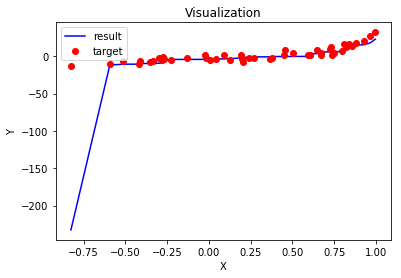

In [8]:
w = getW('..\\Datasets\\Dataset_1_train.csv')
produceResultPoint('..\\Datasets\\Dataset_1_valid.csv', w)

Visualize the fit of the test set

In [43]:
w = getW('..\\Datasets\\Dataset_1_train.csv')
produceResultPoint('..\\Datasets\\Dataset_1_test.csv', w)

ValueError: could not convert string to float: 

For the validatio set, as shown above the all the point except for the first one fits ok, the unregulated linear regression cannot handle the x input x = 0.996344491497

### 1.2 L2 regulation

<p>The function below produces the w matrix with the input value λ. Using the equation w=(x^T x+ λI)^(-1) x^T y</p>

In [10]:
def getWstar(trainSetPath, lamda):
    with open(trainSetPath) as trainData1:
        readCSV = csv.reader(trainData1, delimiter=',')
        inputVarTemp = []
        targetVarTemp = []
        inputVar = []
        targetVar = []
        one = []
        for row in readCSV:
            inputVarTemp.append(float(row[0]))
            targetVarTemp.append(float(row[1]))
        for i in range(len(inputVarTemp)):
            one.append(1.0)
    for j in range(m, 0, -1):
        currentInput = np.power(inputVarTemp, j)
        inputVar.append(currentInput)

    inputVar.append(one)
    targetVar.append(targetVarTemp)
    inputVar = np.transpose(np.array(inputVar, dtype='float'))
    targetVar = np.transpose(np.array(targetVar, dtype='float'))
    step1 = np.dot(np.transpose(inputVar), inputVar)
    step2 = np.add(step1, lamda * np.identity(step1.shape[0]))
    step3 = np.linalg.inv(step2)
    step4 = np.dot(np.transpose(inputVar), targetVar)
    w = np.dot(step3, step4)
    return w

The function below will try different lamda values in an increment order, and it will plot the MSE error againist the lamda value for the training set and the validation set, finally it will print out the lamda that has the lowest MSE on the validation dataset.

In [11]:
def findLamda():
    lamda = 0.0
    MSESet = []
    MSESet2 = []
    wSet = []
    lamdas = []
    while (lamda <= 1):
        w = getWstar('..\\Datasets\\Dataset_1_train.csv', lamda)
        wSet.append(w)
        # temp = []
        lamdas.append(lamda)
        MSESet.append(calMSE('..\\Datasets\\Dataset_1_valid.csv', w))
        # MSESet.append(temp)
        lamda += 0.005
    lamda = 0.0
    while (lamda <= 1):
        w = getWstar('..\\Datasets\\Dataset_1_train.csv', lamda)
        # temp = []
        # temp.append(lamda)
        MSESet2.append(calMSE('..\\Datasets\\Dataset_1_train.csv', w))
        # MSESet2.append(temp)
        lamda += 0.005
    plt.plot(lamdas,MSESet, 'r',label = 'Valid MSE')
    plt.plot(lamdas,MSESet2, 'b', label = 'Train MSE')
    plt.legend()
    plt.axis([0, 1, 5, 10])
    plt.title('MSE vs Lamda')
    plt.xlabel('Lamda')
    plt.ylabel('MSE')
    plt.show()
    minErr = 0.0
    minLamda = 0.0
    minW = []
    for i in range(len(MSESet)):
        if (minErr == 0.0):
            minErr = MSESet[i]
            minLamda = lamdas[i]
            minW = wSet[i]
        elif (minErr > MSESet[i]):
            minErr = MSESet[i]
            minLamda = lamdas[i]
            minW = wSet[i]
    print('the lamda that has minimum error = '+str(minLamda)
          +', where the MSE for the validation set is '+ str(minErr))

Plot the training MSE and Validation MSE againist lamda

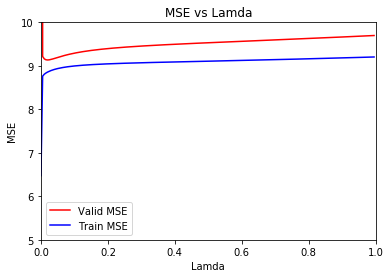

the lamda that has minimum error = 0.02, where the MSE for the validation set is 9.13509878469


In [12]:
findLamda()

now we have the optimum lambda = 0.02, then we will use this value to visualize the fit 

first on the training set

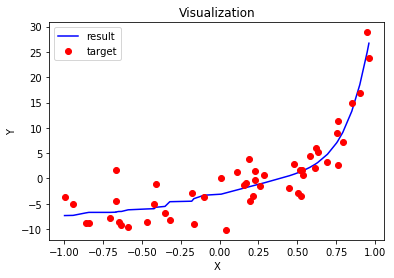

In [13]:
w = getWstar('..\\Datasets\\Dataset_1_train.csv', 0.02)
produceResultPoint('..\\Datasets\\Dataset_1_train.csv', w)

then on the validation set

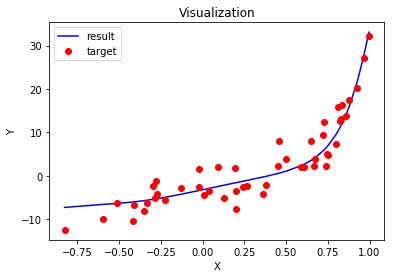

In [14]:
w = getWstar('..\\Datasets\\Dataset_1_train.csv', 0.02)
produceResultPoint('..\\Datasets\\Dataset_1_valid.csv', w)

finally on the test set

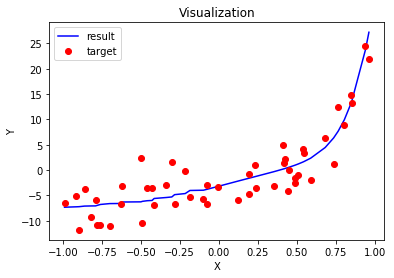

In [15]:
w = getWstar('..\\Datasets\\Dataset_1_train.csv', 0.02)
produceResultPoint('..\\Datasets\\Dataset_1_test.csv', w)

after adding the L2 regulation, the quality of the fit for the validation set and test set has been greatly improved compare to the nonregulated model

### 1.3

the source does not have a large degree of polynomial, from the visualization shown above, the source looks like a exponential curve

### Question 2

### 2.1

Applying the gradient decent method to our data, using the equation y = w0 + w1x

the function below will produce the w matrix using the gradient decent method with a step size of 1e-6 and run a given number of steps, finally produce the plots for the training set and validation set MSE respectively

In [16]:
stepSize = 1e-6
def getWByGD(trainPath,stepSize,numStep):#'Datasets\\Dataset_2_train.csv'
    with open(trainPath) as trainData:
        readCSV = csv.reader(trainData, delimiter=',')
        xTemp = []
        x = []
        y = []
        one = []

        for row in readCSV:
            xTemp.append(float(row[0]))
            y.append(float(row[1]))
        for i in range(len(xTemp)):
            one.append(1.0)


        x.append(xTemp)
        x.append(one)
        y = np.transpose(np.array(y, dtype='float'))
        x = np.transpose(np.array(x,dtype='float'))

    w= np.array([1.0,1.0],dtype='float')
    MSEListValid = []
    MSEListTrain = []
    with open('..\\Datasets\\Dataset_2_valid.csv') as validData:
        readCSV = csv.reader(validData, delimiter=',')
        xTemp = []
        one =[]
        x1 = []
        y1 = []

        for row in readCSV:
            xTemp.append(float(row[0]))
            y1.append(float(row[1]))

        for i in range(len(xTemp)):
            one.append(1.0)

        x1.append(xTemp)
        x1.append(one)
        y1 = np.transpose(np.array(y1, dtype='float'))
        x1 = np.transpose(np.array(x1,dtype='float'))

    for i in range (numStep):
        for j in range (x.shape[0]):
            w[1] = w[1] - stepSize*(w[1]+w[0]*x[j][0] - y[j])
            w[0] = w[0] - stepSize * (w[1] + w[0] * x[j][0] - y[j])*x[j][0]

        MSEListValid.append(calMSE(x1,y1,w))
        MSEListTrain.append(calMSE(x,y,w))
 
    plt.plot(MSEListValid,'r',label = 'valid MSE')
    plt.plot(MSEListTrain,'b',label = 'train MSE')
    plt.legend()
    plt.axis([0,numStep,0,30])
    plt.title('MSE vs Step number')
    plt.xlabel('Step Number')
    plt.ylabel('MSE')
    plt.show()

    return w

the function below calculates the MSE

In [17]:
def calMSE (x,y,w):
    YsXw = np.subtract(np.dot(x,w),y)
    Error = np.square(YsXw).mean()
    return Error

here we produce the learning curve (MSE vs step plot for both training set and validation set) for w in 15000 steps(1e-6 each step)

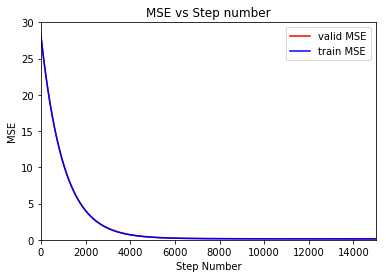

In [18]:
w = getWByGD('..\\Datasets\\Dataset_2_train.csv',stepSize,15000)

the MSE is droping dramatically as the step number increases

### 2.2

here we will try different step size to find the optimal one, try to find the one with the quickest drop

Step Size = 4.9999999999999996e-06


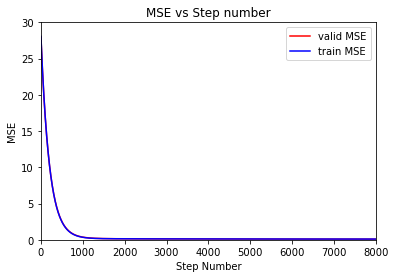

Step Size = 2.4999999999999998e-05


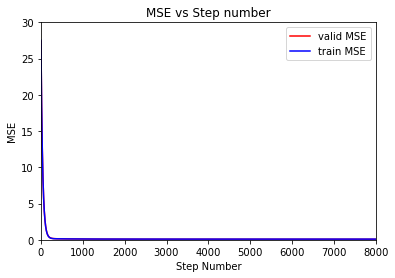

Step Size = 0.000125


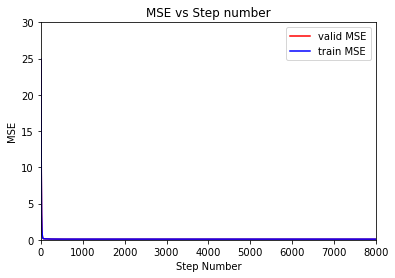

Step Size = 0.000625


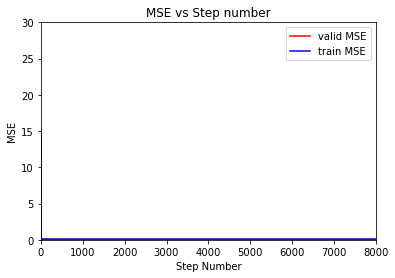

Step Size = 0.0031249999999999997


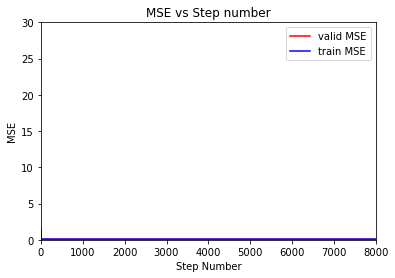

In [19]:
for i in range(1,6):
    stepSize = 1e-6
    stepSize = stepSize*5**i
    print('Step Size = '+str(stepSize))
    w = getWByGD('..\\Datasets\\Dataset_2_train.csv',stepSize,8000)



it seems like the largest step we can take without error is 0.000125 where we can make the function converge in around 100 steps

### 2.3

the function below will produce the W matrix of given train set step size and step number

In [20]:
def getWByGDNoGraph(trainPath,stepSize,numStep):#'Datasets\\Dataset_2_train.csv'
    with open(trainPath) as trainData:
        readCSV = csv.reader(trainData, delimiter=',')
        xTemp = []
        x = []
        y = []
        one = []

        for row in readCSV:
            xTemp.append(float(row[0]))
            y.append(float(row[1]))
        for i in range(len(xTemp)):
            one.append(1.0)


        x.append(xTemp)
        x.append(one)
        y = np.transpose(np.array(y, dtype='float'))
        x = np.transpose(np.array(x,dtype='float'))

    w= np.array([1.0,1.0],dtype='float')
    for i in range (numStep):
        for j in range (x.shape[0]):
            w[1] = w[1] - stepSize*(w[1]+w[0]*x[j][0] - y[j])
            w[0] = w[0] - stepSize * (w[1] + w[0] * x[j][0] - y[j])*x[j][0]

    return w



here we 

In [21]:
def calTarget (x , w):
    y = w[1] + x * w[0]

    return y

def produceResultPoint (testDataPath,w):
    with open(testDataPath) as trainData1:
        readCSV = csv.reader(trainData1,delimiter=',')
        inputVar = []
        targetVar = []
        result = []

        for row in readCSV:
            inputVar.append(float(row[0]))
            targetVar.append(float(row[1]))
        for i in range(len(inputVar)):
            result.append(calTarget(inputVar[i],w))
    
    plt.plot(inputVar,result,'g',label = 'result')
    plt.plot(inputVar,targetVar,'ro',label = 'target')
    plt.legend()
    plt.title('Visualization')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

visualize the training process, the 5 visualizations below shows how the fit changes as we increase the steps

In [22]:
%matplotlib inline

step number = 1100


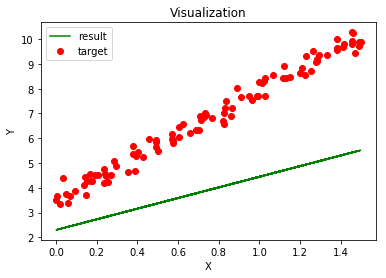

step number = 3300


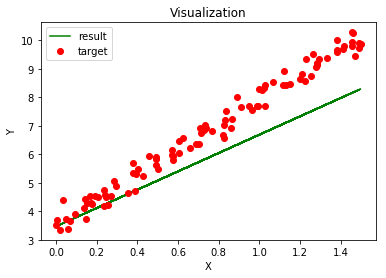

step number = 5500


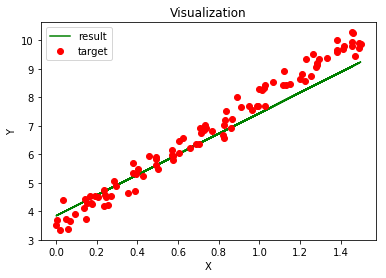

step number = 7700


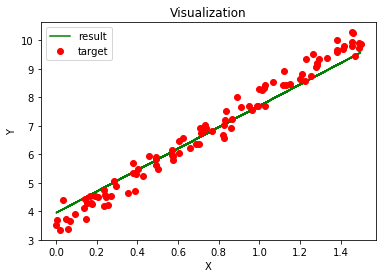

step number = 9900


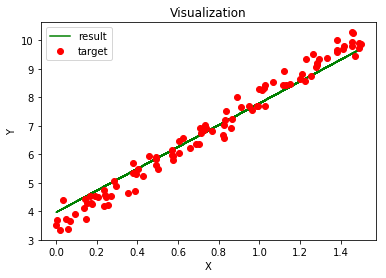

In [23]:
for i in range (1,10,2):
    stepSize = 1e-6
    stepNum = i * 1100
    print('step number = '+ str(stepNum))
    w = getWByGDNoGraph('..\\Datasets\\Dataset_2_train.csv',stepSize,stepNum)
    produceResultPoint('..\\Datasets\\Dataset_2_valid.csv',w)

### Question 3

### 3.1

 the function below will handle the input data, we have the data itself and the statics of the data in two separate csv files, first the function will complete the dataset by filling all missing attributes using the median of the column. The mean value is an ok choice, however I believe the median could be a better choice. Since there could be outliers in the dataset, and median is not affect by it. And we could also randomly choose any existing value to fill in the blank to introduce more randomness. After that, the function will shuffle the data and store them using the 80-20 splits.

In [24]:
from random import shuffle
def prepareData(dataPath, statPath):
    with open(dataPath) as dataPath:
        readCSV = csv.reader(dataPath, delimiter=',')
        data = []
        for row in readCSV:
            data.append(row)
    with open(statPath) as statPath:
        readCSV = csv.reader(statPath, delimiter=',')
        stat = []
        for row in readCSV:
            stat.append(row)

    for j in range(len(data)):
        for i in range(5, len(data[0])):
            if (data[j][i] == '?'):
                data[j][i] = stat[i - 5][6]
    shuffle(data)
    dataPortions = []

    c = 0
    for i in range(0, len(data), 399):
        c += 1
        if (c < 5):
            dataPortions.append(data[i:i + 399])
        else:
            dataPortions.append(data[i:len(data)])
    for i in range(1, 6):
        with open('..\\Datasets\\CandC-train' + str(i) + '.csv', 'w', newline='') as csvfile:
            csvWriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            for j in range(len(dataPortions)):
                if (i - 1 != j):
                    for k in range(len(dataPortions[j])):
                        csvWriter.writerow(dataPortions[j][k])
        with open('..\\Datasets\\CandC-test' + str(i) + '.csv', 'w', newline='') as csvfile:
            csvWriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
            for k in range(len(dataPortions[i - 1])):
                csvWriter.writerow(dataPortions[i - 1][k])

### 3.2

the function below will calculate w using linear regression without regulation

In [25]:
def getW(trainPath):
    with open(trainPath) as trainData1:
        readCSV = csv.reader(trainData1, delimiter=',')
        inputVar = []
        targetVar = []

        for row in readCSV:
            inputVarTemp = []
            for i in range(5, len(row) - 1):
                inputVarTemp.append(float(row[i]))
            inputVarTemp.append(1.0)
            inputVar.append(inputVarTemp)
            targetVarTemp = []
            targetVarTemp.append(float(row[len(row) - 1]))
            targetVar.append(targetVarTemp)

    inputVar = np.array(inputVar, dtype='float')
    targetVar = (np.array(targetVar, dtype='float'))
    step1 = np.dot(np.transpose(inputVar), inputVar)  # xtx
    step2 = np.dot(np.transpose(inputVar), targetVar)  # xty
    w = np.dot(np.linalg.inv(step1), step2)
    return w


the function below will calculate the MSE

In [26]:
def calMSE(testDataPath, w):
    with open(testDataPath) as trainData1:
        readCSV = csv.reader(trainData1, delimiter=',')
        inputVar = []
        targetVar = []

        for row in readCSV:
            inputVarTemp = []
            for i in range(5, len(row) - 1):
                inputVarTemp.append(float(row[i]))
            inputVarTemp.append(1.0)
            inputVar.append(inputVarTemp)
            targetVarTemp = []
            targetVarTemp.append(float(row[len(row) - 1]))
            targetVar.append(targetVarTemp)
    inputVar = np.array(inputVar, dtype='float')
    targetVar = (np.array(targetVar, dtype='float'))

    YsXw = np.subtract(targetVar, np.dot(inputVar, w))
    Error = np.square(YsXw).mean()
    return Error

here we will run the code on 5 different 80-20 splits, and store the parameter learnt in a csv file called ParameterLearntQ3-2.csv, in the file there are 123 rows and 5 columns, each row represents a parameter (122 features and one noise term where x = 1)and each column represents an 80-20 split data set. 

In [28]:
Ws = []
for i in range(1, 6):
    w = getW('..\\Datasets\\CandC-train' + str(i) + '.csv')
    Ws.append(w)
    mse = calMSE('..\\Datasets\\CandC-test' + str(i) + '.csv', w)
    print('the MSE for 80-20 split '+str(i)+ ' is '+str(mse))
with open('..\\Datasets\\ParameterLearntQ3-2.csv', 'w', newline='') as csvfile:
    csvWriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for j in range(0, 123):
        rowTemp = []
        rowTemp.append(Ws[0][j][0])
        rowTemp.append(Ws[1][j][0])
        rowTemp.append(Ws[2][j][0])
        rowTemp.append(Ws[3][j][0])
        rowTemp.append(Ws[4][j][0])
        csvWriter.writerow(rowTemp)

the MSE for 80-20 split 1 is 0.0224269076138
the MSE for 80-20 split 2 is 0.019497119073
the MSE for 80-20 split 3 is 0.0183477433374
the MSE for 80-20 split 4 is 0.0197028885344
the MSE for 80-20 split 5 is 55.1123236905


the best MSE achieced is 0.0183477433374 on 80-20 split 3, the parameters learnt were stored in Ws

### 3.3

the following functions below will apply the Ridge-regression on the data, with an input lamda, first we will get the W matrix

In [29]:
def getWRidge(trainSetPath, lamda):
    with open(trainSetPath) as trainData1:
        readCSV = csv.reader(trainData1, delimiter=',')
        inputVar = []
        targetVar = []

        for row in readCSV:
            inputVarTemp = []
            for i in range(5, len(row) - 1):
                inputVarTemp.append(float(row[i]))
            inputVarTemp.append(1.0)
            inputVar.append(inputVarTemp)
            targetVarTemp = []
            targetVarTemp.append(float(row[len(row) - 1]))
            targetVar.append(targetVarTemp)

    inputVar = np.array(inputVar, dtype='float')
    targetVar = (np.array(targetVar, dtype='float'))
    step1 = np.dot(np.transpose(inputVar), inputVar)
    step2 = np.add(step1, lamda * np.identity(step1.shape[0]))
    step3 = np.linalg.inv(step2)
    step4 = np.dot(np.transpose(inputVar), targetVar)
    w = np.dot(step3, step4)
    return w

then we will find the optimal lamda, by varing lamda and get the w matrix produced by getWRidge function and calculate the MSE average, the lamda that produce the smallest MSE average is the optimal one

In [30]:
def findLamda():
    lamda = 1e-10
    MSEAverage = []
    lamdas = []
    Ws = []
    while (lamda <= 10000):
        MSEs = []
        Wtemp = []
        for i in range(1, 6):
            w = getWRidge('..\\Datasets\\CandC-train' + str(i) + '.csv', lamda)
            mse = calMSE('..\\Datasets\\CandC-test' + str(i) + '.csv', w)
            MSEs.append(mse)
            Wtemp.append(w)
        meanMSE = np.array(MSEs, dtype='float').mean()
#         print(meanMSE)
        MSEAverage.append(meanMSE)
        lamdas.append(math.log10(lamda))
        Ws.append(Wtemp)
        lamda = lamda * 10
    minErr = 0.0
    minLamda = 0.0
    for i in range(len(lamdas)):
        if (minErr == 0.0):
            minErr = MSEAverage[i]
            minLamda = lamdas[i]
        elif (minErr > MSEAverage[i]):
            minErr = MSEAverage[i]
            minLamda = 10**lamdas[i]
            minW = Ws[i]
    plt.plot(lamdas, MSEAverage)
    plt.title('MSE vs Lamda')
    plt.xlabel('log(Lamda)')
    plt.ylabel('MSE')
    plt.show()
    print('the optimal lamda is = '+str(minLamda)+', produce an Average MSE of '
            +str(minErr))

find minimum lamda

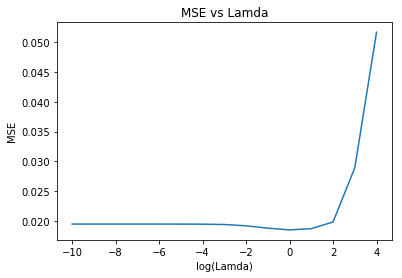

the optimal lamda is = 1.0, produce an Average MSE of 0.0185067816579


In [36]:
findLamda()

From the parameter matrix w, we could tell some features are redundant or irrelevant. The weight for irrelevant feature must be low thus they can be removed. However, according to the source, all the data has been normalized in a way that does not preserve relationships between values BETWEEN attributes, so there will not be strong corrlation between features.

here we get the w matrix using lamda = 1.0 and analysis which feature is irrelevant, to analysis the features, the features are stored in a file called ParameterLearntQ3-3.csv in the same fasion as in question 3.2.

In [37]:
Ws = []
for i in range(1, 6):
    w = getWRidge('..\\Datasets\\CandC-train' + str(i) + '.csv', 1.0)
    Ws.append(np.array(w))

with open('..\\Datasets\\ParameterLearntQ3-3.csv', 'w', newline='') as csvfile:
    csvWriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for j in range(0, 123):
        rowTemp = []
        rowTemp.append(Ws[0][j][0])
        rowTemp.append(Ws[1][j][0])
        rowTemp.append(Ws[2][j][0])
        rowTemp.append(Ws[3][j][0])
        rowTemp.append(Ws[4][j][0])
        csvWriter.writerow(rowTemp)


the function below will help us visualize the fit and plot the graph

In [38]:
def produceResultPoint(testDataPath, w):
    with open(testDataPath) as trainData1:
        readCSV = csv.reader(trainData1, delimiter=',')
        inputVar = []
        targetVar = []

        for row in readCSV:
            inputVarTemp = []
            for i in range(5, len(row) - 1):
                inputVarTemp.append(float(row[i]))
            inputVarTemp.append(1.0)
            inputVar.append(inputVarTemp)
            targetVarTemp = []
            targetVarTemp.append(float(row[len(row) - 1]))
            targetVar.append(targetVarTemp)
    inputVar = np.array(inputVar, dtype='float')
    targetVar = (np.array(targetVar, dtype='float'))
    result = np.dot(inputVar, w)
    plt.plot(result, 'b^',label = 'result')
    plt.plot(targetVar, 'ro', label = 'target')
    plt.legend()
    plt.title('Visualization')
    plt.ylabel('Y')
    plt.show()

visualize the fit before feature selection using the optimum lamda 

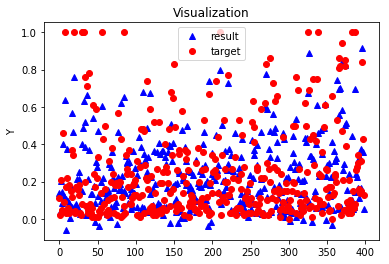

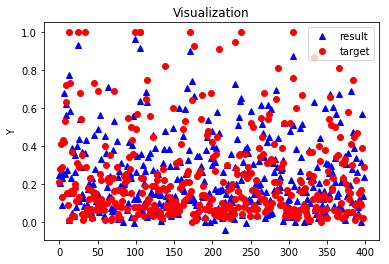

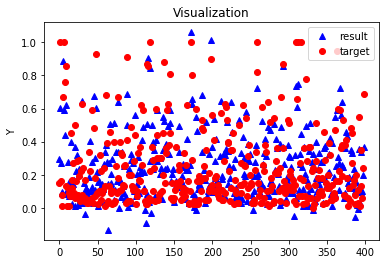

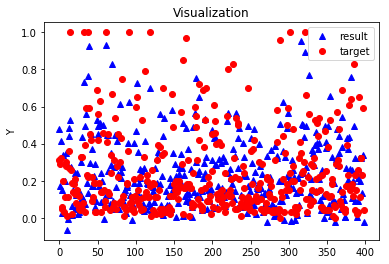

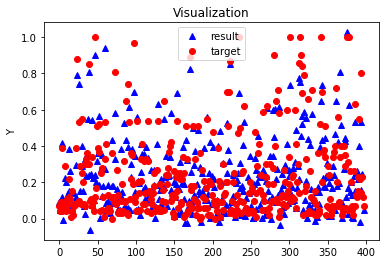

In [41]:
for i in range(1, 6):
    w = getWRidge('..\\Datasets\\CandC-train' + str(i) + '.csv', 1.0)
    print('visualization for set '+str(i))
    produceResultPoint('..\\Datasets\\CandC-test' + str(i) + '.csv', w)
    

as shown in the plots above the fit is not perfect

### feature selecction

Now the features that has the smallest absolute value of average weight when lamda equals to 1 will be removed from the model, the MSEs and the fit will be analysised

first we will have the feature select version of the code for getting the W matrix, getting MSE, and plot the fit. They behave the same as the origional version, except that there is a removed features input which specified the index of the features that we do not want to include in our model.

In [51]:
def getWRidgeFS(trainSetPath,lamda,removedFeatures):
    with open(trainSetPath) as trainData1:
        readCSV = csv.reader(trainData1, delimiter=',')
        inputVar = []
        targetVar = []

        for row in readCSV:
            inputVarTemp = []
            for i in range(5, len(row) - 1):
                if ((i == removedFeatures).any()):
                    pass
                else:
                    inputVarTemp.append(float(row[i]))
            inputVarTemp.append(1.0)
            inputVar.append(inputVarTemp)
            targetVarTemp = []
            targetVarTemp.append(float(row[len(row) - 1]))
            targetVar.append(targetVarTemp)


    inputVar = np.array(inputVar, dtype='float')
    targetVar = (np.array(targetVar, dtype='float'))
    step1 = np.dot(np.transpose(inputVar), inputVar)
    step2 = np.add(step1, lamda * np.identity(step1.shape[0]))
    step3 = np.linalg.inv(step2)
    step4 = np.dot(np.transpose(inputVar), targetVar)
    w = np.dot(step3, step4)
    return w

def produceResultPointFS(testDataPath, w,removedFeatures):
    with open(testDataPath) as trainData1:
        readCSV = csv.reader(trainData1, delimiter=',')
        inputVar = []
        targetVar = []

        for row in readCSV:
            inputVarTemp = []
            for i in range(5, len(row) - 1):
                if ((i == removedFeatures).any()):
                    pass
                else:
                    inputVarTemp.append(float(row[i]))
            inputVarTemp.append(1.0)
            inputVar.append(inputVarTemp)
            targetVarTemp = []
            targetVarTemp.append(float(row[len(row) - 1]))
            targetVar.append(targetVarTemp)
    inputVar = np.array(inputVar, dtype='float')
    targetVar = (np.array(targetVar, dtype='float'))
    result = np.dot(inputVar, w)
    plt.plot(result, 'b^',label = 'result')
    plt.plot(targetVar, 'ro', label = 'target')
    plt.legend()
    plt.show()


def calMSEFS(testDataPath, w ,removedFeatures):
    with open(testDataPath) as trainData1:
        readCSV = csv.reader(trainData1, delimiter=',')
        inputVar = []
        targetVar = []

        for row in readCSV:
            inputVarTemp = []
            for i in range(5, len(row) - 1):
                if ((i == removedFeatures).any()):
                    pass
                else:
                    inputVarTemp.append(float(row[i]))
            inputVarTemp.append(1.0)
            inputVar.append(inputVarTemp)
            targetVarTemp = []
            targetVarTemp.append(float(row[len(row) - 1]))
            targetVar.append(targetVarTemp)
    inputVar = np.array(inputVar, dtype='float')
    targetVar = (np.array(targetVar, dtype='float'))

    YsXw = np.subtract(targetVar, np.dot(inputVar, w))
    Error = np.square(YsXw).mean()
    return Error

then we are going to get the top 53 features that has smallest absolute value of average weight, so we have 70 features left

In [71]:
Ws = []
for i in range(1, 6):
    w = getWRidge('..\\Datasets\\CandC-train' + str(i) + '.csv', 1.0)
    Ws.append(np.array(w))

WAvg = []
for j in range(0, 123):
    rowTemp = []
    sum = 0.0
    rowTemp.append(Ws[0][j][0])
    rowTemp.append(Ws[1][j][0])
    rowTemp.append(Ws[2][j][0])
    rowTemp.append(Ws[3][j][0])
    rowTemp.append(Ws[4][j][0])

    for k in range(len(rowTemp)):
        sum += abs(rowTemp[k])
    WAvg.append(sum/len(rowTemp))
WAvg = np.array(WAvg,dtype='float')
smallValues = WAvg.argsort()[:53]

Here we use these small values to calculate the MSEs

In [74]:
MSEs = []
for i in range(1, 6):
    w = getWRidgeFS('..\\Datasets\\CandC-train' + str(i) + '.csv', 1.0,smallValues)
    mse = calMSEFS('..\\Datasets\\CandC-test' + str(i) + '.csv', w,smallValues)
    MSEs.append(mse)
    print('the MSE for 80-20 split ' + str(i) + ' with feature selection is ' + str(mse))
print ('the mean MSE is '+str(np.array(MSEs, dtype='float').mean()))

the MSE for 80-20 split 1 with feature selection is 0.021197917001
the MSE for 80-20 split 2 with feature selection is 0.0189699196655
the MSE for 80-20 split 3 with feature selection is 0.0186198389007
the MSE for 80-20 split 4 with feature selection is 0.0193600318562
the MSE for 80-20 split 5 with feature selection is 0.0187975785119
the mean MSE is 0.0193890571871


As shown above the MSE of the 80 feature model have not increase by a considerable amount, thus the output could be dominated by a number of features

then we visualize the fit for each 80-20 split set

visualization for set 1


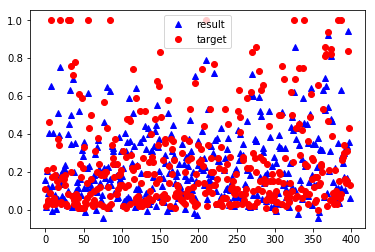

visualization for set 2


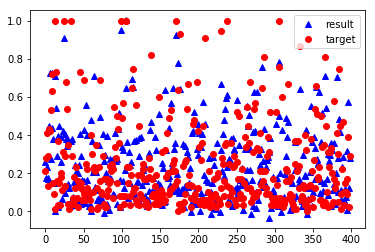

visualization for set 3


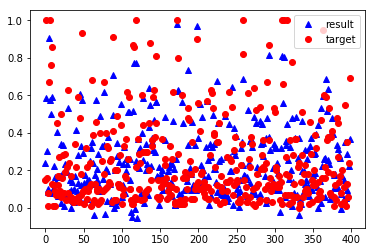

visualization for set 4


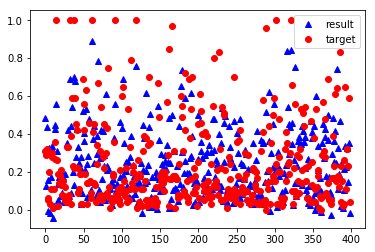

visualization for set 5


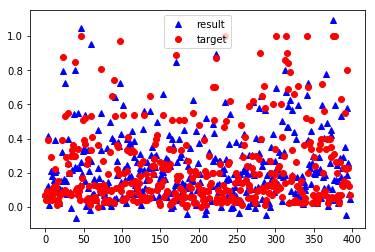

In [73]:
for i in range(1, 6):
    w = getWRidgeFS('..\\Datasets\\CandC-train' + str(i) + '.csv', 1.0,smallValues)
    print('visualization for set '+str(i))
    produceResultPointFS('..\\Datasets\\CandC-test' + str(i) + '.csv', w,smallValues)

As shown above, the fits looks almost the same as the ones that we have not reduce any features, however the computing time has been reduced by a considerable amount (70 features vs 123 features). Feature selection can also prevent over fitting.